# PyTorch Workflow
1) get data ready: turn into tensors 

2) build or pick a pretrained model to suit your problem 
- pick a loss function and optimizer 
- build a training loop

3) fit model to the data and make a prediction 

4) evaluate model 

5) improve through experimentation

6) save and reload model

In [1]:
what_were_covering={
    1:"data (prepare and load)",
    2: "build model",
    3: "fitting model to data (training)",
    4: "model evaluation, making predictions",
    5:"saving and loading a model",
    6:"putting it all together"
}

In [2]:
import torch
from torch import nn 
import numpy as np 
import matplotlib.pyplot as plt 

## check pytorch version
torch.__version__

'2.1.2+cpu'

## 1) Data: preparing and loading

### ML 2 parts
1) get data into numerical representation

2) build a model, pretrained model to learn patterns in data

### use linear regression formula to make a straight line with known parameters 

In [3]:
weight = 0.7
bias =0.3

## data 
start =0
end =1
step =0.02
X= torch.arange(start ,end , step).unsqueeze(dim=1)
y = weight *X + bias 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
#  split data into training and testing sets
train_split=int(0.8 * len(X))
X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]

In [5]:
len(X_train), len(y_train)

(40, 40)

In [6]:
len(X_test), len(y_test)

(10, 10)

In [7]:
def plot_predictions(train_data= X_train, 
                     train_labels= y_train,
                     test_data=X_test, 
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b",s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
    
    if predictions is not None: 
        plt.scatter(test_data, predictions, c="r",s=4, label=predictions)
    plt.legend(prop={"size":14})

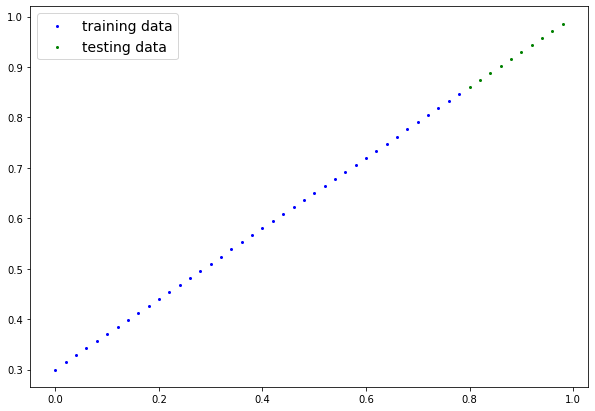

In [8]:
plot_predictions()

## what our model does
- start with random values (weight and bias)

- look at training data and adjust the random values to better represent the ideal values (weight and bias values we used to create the data)

## does it by 
- gradient descent 

- backpropagation

In [9]:
# linear regression model class

class LinearRegressionModel(nn.Module): ## nn contains all building blocks for neural nets
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1, requires_grad= True, dtype=torch.float))
        self.bias= nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias 
      
    

In [10]:
## see whats inside model 
## manual seed 
torch.manual_seed(42)

## creaete model instance 
model_0= LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
## List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias 

(0.7, 0.3)

## making prediction using torch.inference_mode()


In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
with torch.no_grad():
    y_preds=model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

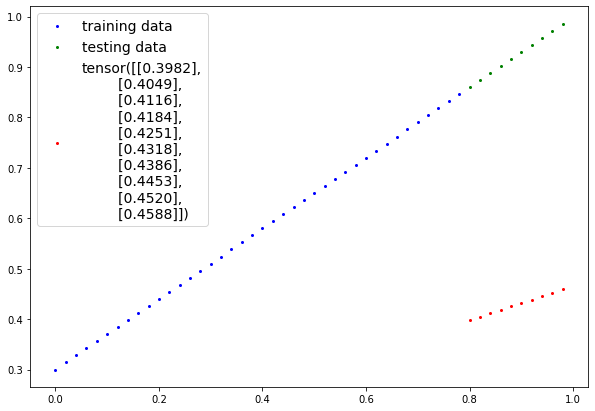

In [15]:
plot_predictions(predictions=y_preds)

## train model 
- for model to move from some unknown parameters to some known ones : better representation of the data 
## one way to measure how poor / wrong models predictions are loss functions
- loss functions: measure how wrong your model's predictons are to the ideal outputs, lower is better
## for training we need 
- loss function : MAE, L1

- optimizer: takes into account the loss of a model and adjusts the model's parameters

In [16]:
# set up loss 
loss_fn = nn.L1Loss()
# set up optimizer --> using stochastic gradient descent
optimizer = torch.optim.SGD( params=model_0.parameters(), lr=0.01) ##lr very important

## building a training loop in pytorch
- loop through data 

- forward pass : forward propagation

- calculate loss: compare forward pass predictions to ground truth labels 

- optimizer zero grad

- loss backwards: move backwards through the network to calculate gradients of each of parameters wrt to loss (*back propagation*)

- optimizer step: adjust parameters to try and improve loss (*gradient descent*) 

In [18]:
## epochs - 1 loop through data 
epochs= 200
epoch_count=[]
loss_values=[]
test_loss_values=[]
# loop through data 
for epoch in range(epochs):
    model_0.train()
    ## forward pass
    y_pred= model_0(X_train)
    
    ## loss : using MAE
    loss=loss_fn(y_pred, y_train)
    #print(f"Loss:{loss}")
    ## optimizer zero grad 
    optimizer.zero_grad()
    
    ## back propagation on loss wrt parameters to model
    loss.backward()
    
    ## step optimizer - perform gradient descent 
    optimizer.step() ## how optimzer changes by default through loop 
    
    model_0.eval() # turns off gradient tracking
    with torch.inference_mode(): ## turns off graient tracking
        test_pred =model_0(X_test)
        test_loss=loss_fn(test_pred, y_test)
    if epoch % 10==0:    
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch:{epoch} | Loss: {loss}| Test Loss:{test_loss}")
        print(model_0.state_dict())

Epoch:0 | Loss: 0.31288138031959534| Test Loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss: 0.1976713240146637| Test Loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss: 0.08908725529909134| Test Loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Loss: 0.053148526698350906| Test Loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Loss: 0.04543796554207802| Test Loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Loss: 0.04167863354086876| Test Loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Loss: 0.03818932920694351| Test Loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:70 | Loss

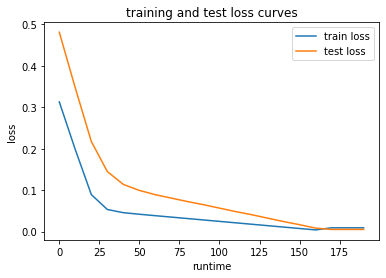

In [19]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="train loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).cpu().numpy()), label="test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("runtime")
plt.legend()

## saving a model in pytorch
- torch.save()

- torch.load()

- torch.nn.Module.load_state_dict()

In [22]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


# save state_dict
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


In [24]:
## to load in a saved state_dict, have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()
# load saved state dict of model_0

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
## make predictions
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
model_0.eval()
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
y_preds== loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### putting it all together 